In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# $AR(N)$ genarator

$$ X_{t} = \sum_{i=1}^{N} A_i X_{t-i} + \xi, $$

where $\xi$ is a noise term.

### Model parameters

In [2]:
# parameters:

N = 6 
#raw_coef = np.random.randint(1,10,size=N)
temp = [2,4,5,6,7,9] # coefficients of model 
sample_size = 1000+N # number of generated points
AR_coef = np.array(temp)
AR_coef = AR_coef/np.sum(AR_coef) #normalisation
AR_sample = np.zeros(sample_size)

### Data Generation

In [3]:
#genaratin initial N values
initial_val = np.array([0.05,0.04])
AR_sample[:2] = initial_val
#initial loop
for i in range(2,N):
    AR_sample[i] = np.dot(AR_coef[-i:], AR_sample[:i]) # sprawdzic 

In [4]:
#full loop - generating data

for i in range(N,sample_size):
    AR_sample[i] = np.dot(AR_coef, AR_sample[i-N:i]) + 0.001*(np.random.random()-0.5)

AR_sample= AR_sample[N:] #removing first N samples


In [5]:
AR_sample = 1000*(AR_sample - np.mean(AR_sample))

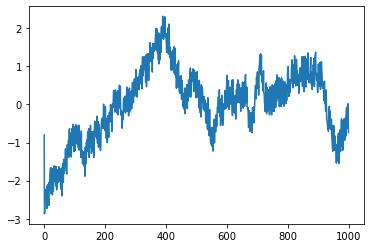

In [6]:
plt.plot(AR_sample)

## AR estimation

For checking purposes - comparison with ML AR model

In [7]:
from statsmodels.tsa.arima.model import ARIMA

In [8]:
model= ARIMA(AR_sample, order=(N,0,0))
results= model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1500
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -3388.444
Date:                Sun, 24 Jan 2021   AIC                           6792.888
Time:                        17:15:42   BIC                           6835.394
Sample:                             0   HQIC                          6808.723
                               - 1500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0993      6.179      0.016      0.987     -12.012      12.211
ar.L1          0.2996      0.026     11.665      0.000       0.249       0.350
ar.L2          0.2823      0.027     10.514      0.000       0.230       0.335
ar.L3          0.0366      0.028      1.322      0.186      -0.018       0.091
ar.L4          0.2301      0.028      8.316      0.000       0.176       0.284
ar.L5          0.0859      0.027      3.182      0.001       0.033       0.139
ar.L6          0.0558      0.025      2.193      0.028       0.006       0.106
sigma2         5.3527      0.311     17.209      0.000       4.743       5.962
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                89.81
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -0.01
Prob(H) (two-sided):                  0.67   Kurtosis:                         1.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Comparison of generator parameters and estimated ones

In [9]:
comp = pd.DataFrame({"model_params" :np.round(AR_coef,4)[::-1], "estimated_params" : results.arparams})

In [10]:
comp

,model_params,estimated_params
0,0.2821,0.299598
1,0.3333,0.282293
2,0.0513,0.036648
3,0.1795,0.230069
4,0.1026,0.085923
5,0.0513,0.055790


### Saving data

In [11]:
#col = ['Item','Sales']
df = pd.DataFrame()

df["Sales"] = AR_sample
df["Item"] = "IT001"
df


,Sales,Item
0,-0.515672,IT001
1,-1.916485,IT001
2,0.056180,IT001
3,0.890699,IT001
4,2.622610,IT001
...,...,...
1495,16.390593,IT001
1496,12.373120,IT001
1497,12.985960,IT001
1498,16.083739,IT001


In [12]:
df.to_csv("raw_data.csv", index=False)